<a href="https://colab.research.google.com/github/cantaruttim/Anemia/blob/main/Anemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('anemia.csv', sep=",")
dataset

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


In [3]:
dataset['Gender'].value_counts()

1    740
0    681
Name: Gender, dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


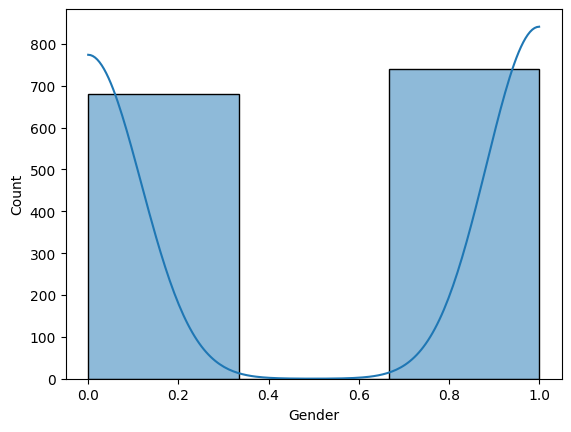

In [5]:
# Male = 0
# Femlae = 1
# proportion is not so different between groups

sns.histplot(dataset['Gender'], kde=True, bins=3);

#                 0                                 1

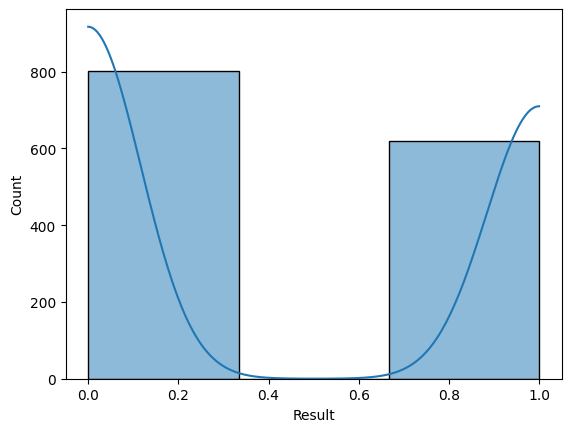

In [6]:
# Not anemic = 0
# Anemic = 1

sns.histplot(dataset['Result'], kde=True, bins=3);
#                 0                                   1

In [7]:
dataset.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


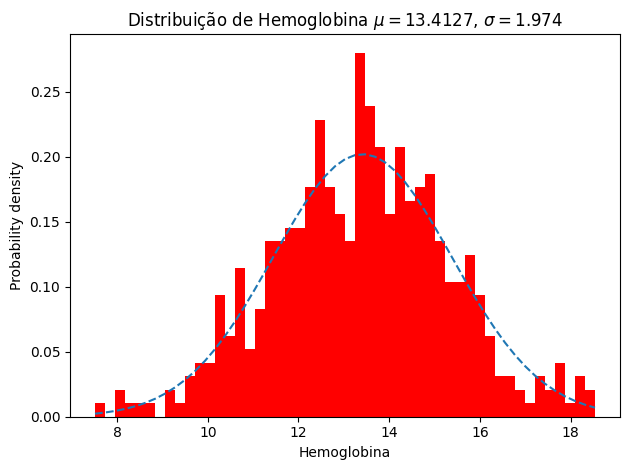

In [8]:
fig, ax = plt.subplots()

# example data
mu = 13.412738  # média da distribuição de Hemoglobina
sigma = 1.974546  # desvio padrão dos dados de Hemoglobina
x = mu + sigma * np.random.randn(437)

num_bins = 50

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True, color="red")

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

ax.set_xlabel('Hemoglobina')
ax.set_ylabel('Probability density')
ax.set_title(r'Distribuição de Hemoglobina $\mu=13.4127$, $\sigma=1.974$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

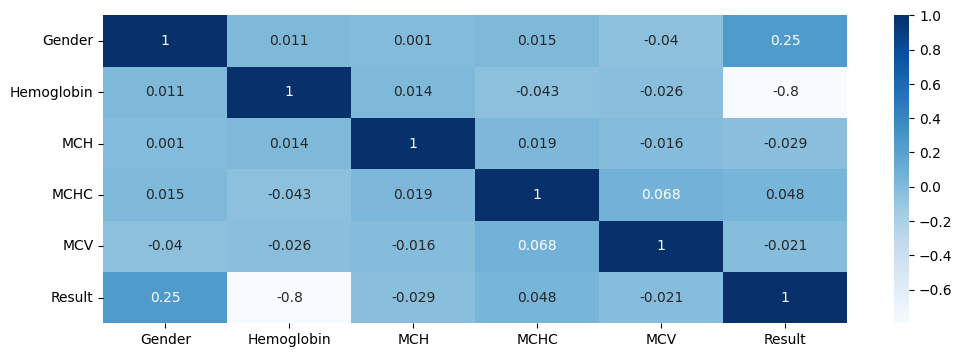

In [9]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.corr(), annot=True, cmap="Blues");

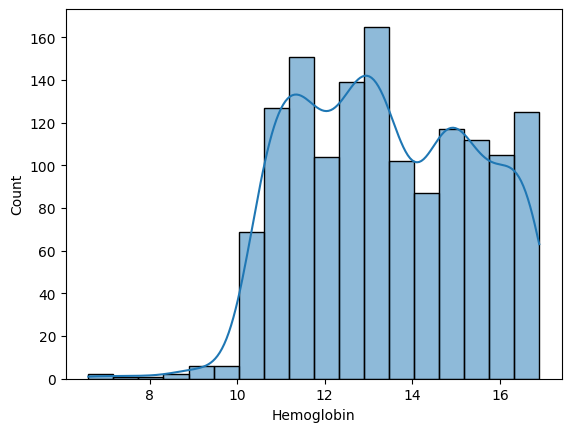

In [10]:
sns.histplot(dataset['Hemoglobin'], kde=True);

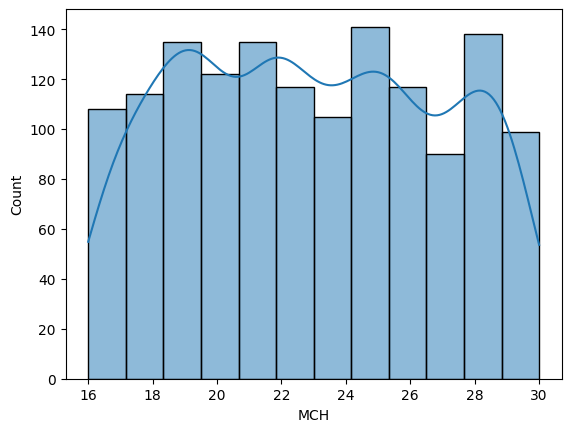

In [11]:
sns.histplot(dataset['MCH'], kde=True);

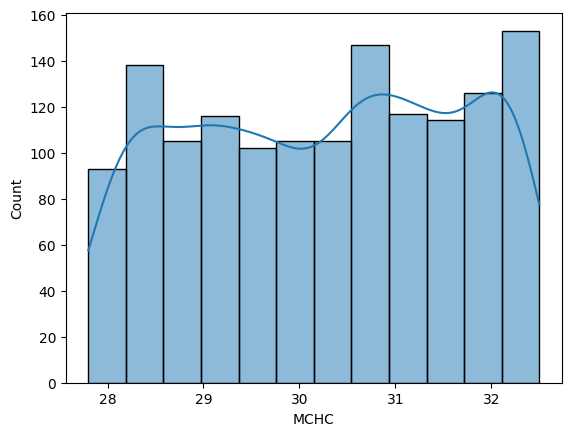

In [12]:
sns.histplot(dataset['MCHC'], kde=True);

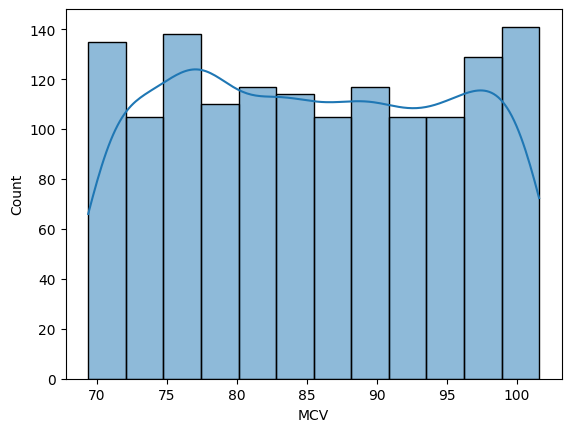

In [13]:
sns.histplot(dataset['MCV'], kde=True);

In [14]:
 """
        Uma das melhores evidências é a análise da hemácia quanto a concentração
        de Hemoglobina presente na célula consequentemente pessoas anêmicas terão uma menor
        proporção de hemoglobina presente na hemácia.

"""

'\n       Uma das melhores evidências é a análise da hemácia quanto a concentração\n       de Hemoglobina presente na célula consequentemente pessoas anêmicas terão uma menor\n       proporção de hemoglobina presente na hemácia.\n\n'

'\nInteressante notar que anêmicos possuem uma quantidade de hemoglobina muito menor do que \nos não anêmicos. Interessante notar também que para a classificação é a feature mais importante!\n\n'

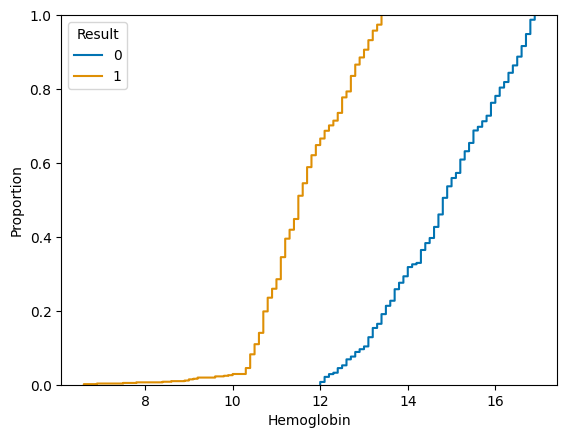

In [15]:
# resultado que mais se difereciou entre os positivos e os negativos
sns.ecdfplot(data=dataset, x="Hemoglobin", hue='Result',
            palette="colorblind");

"""
Interessante notar que anêmicos possuem uma quantidade de hemoglobina muito menor do que
os não anêmicos. Interessante notar também que para a classificação é a feature mais importante!

"""

Text(0.5, 1.0, 'mean corpuscular volume')

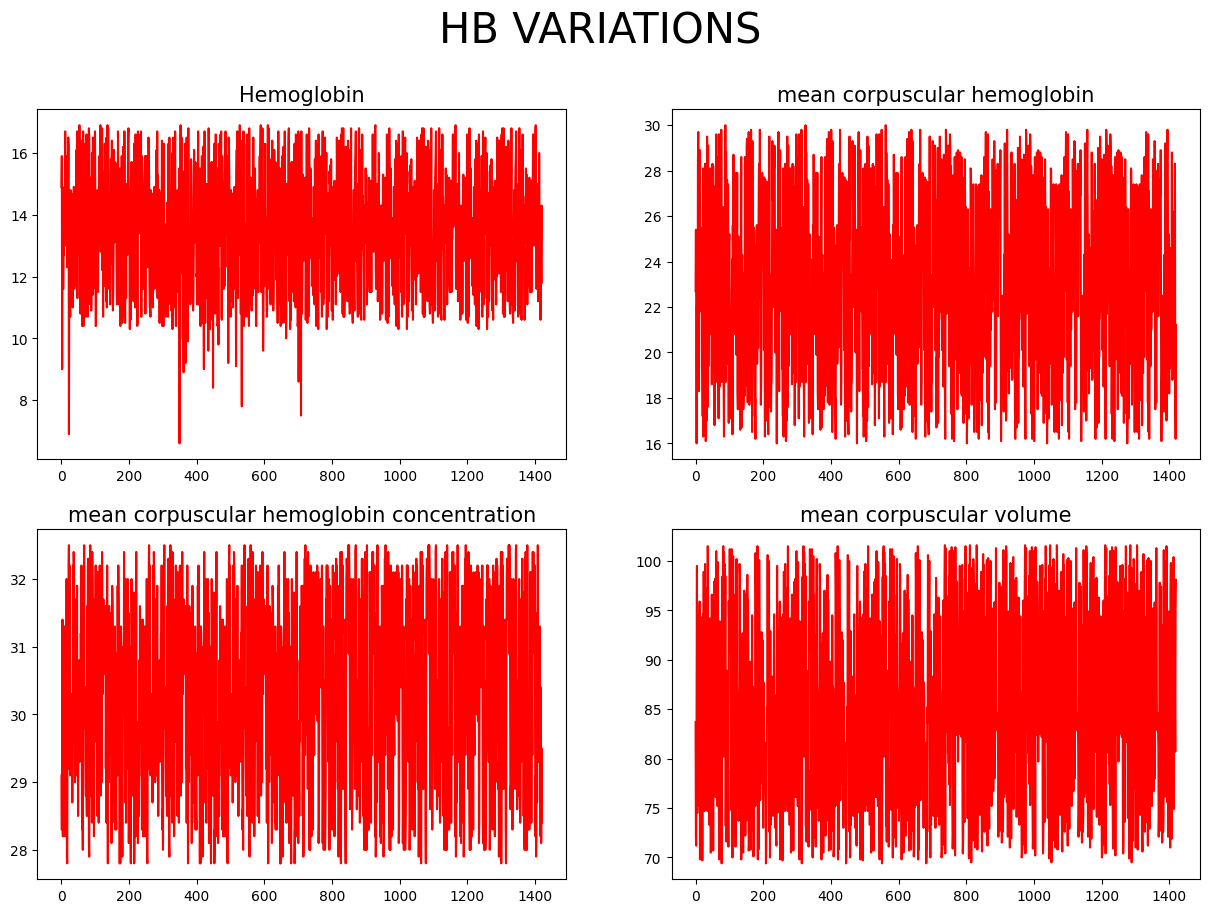

In [16]:
fig, ax = plt.subplots(ncols = 2, nrows=2, figsize=(15,10));
fig.suptitle("HB VARIATIONS", size=30, color='black')

ax[0, 0].plot(dataset['Hemoglobin'], color="red")
ax[0, 0].set_title("Hemoglobin", color='black', fontsize=15)

ax[0, 1].plot(dataset['MCH'], color="red")
ax[0, 1].set_title("mean corpuscular hemoglobin", color='black', fontsize=15)

ax[1, 0].plot(dataset['MCHC'], color="red")
ax[1, 0].set_title("mean corpuscular hemoglobin concentration", color='black', fontsize=15)


ax[1, 1].plot(dataset['MCV'], color="red")
ax[1, 1].set_title("mean corpuscular volume", color='black', fontsize=15)

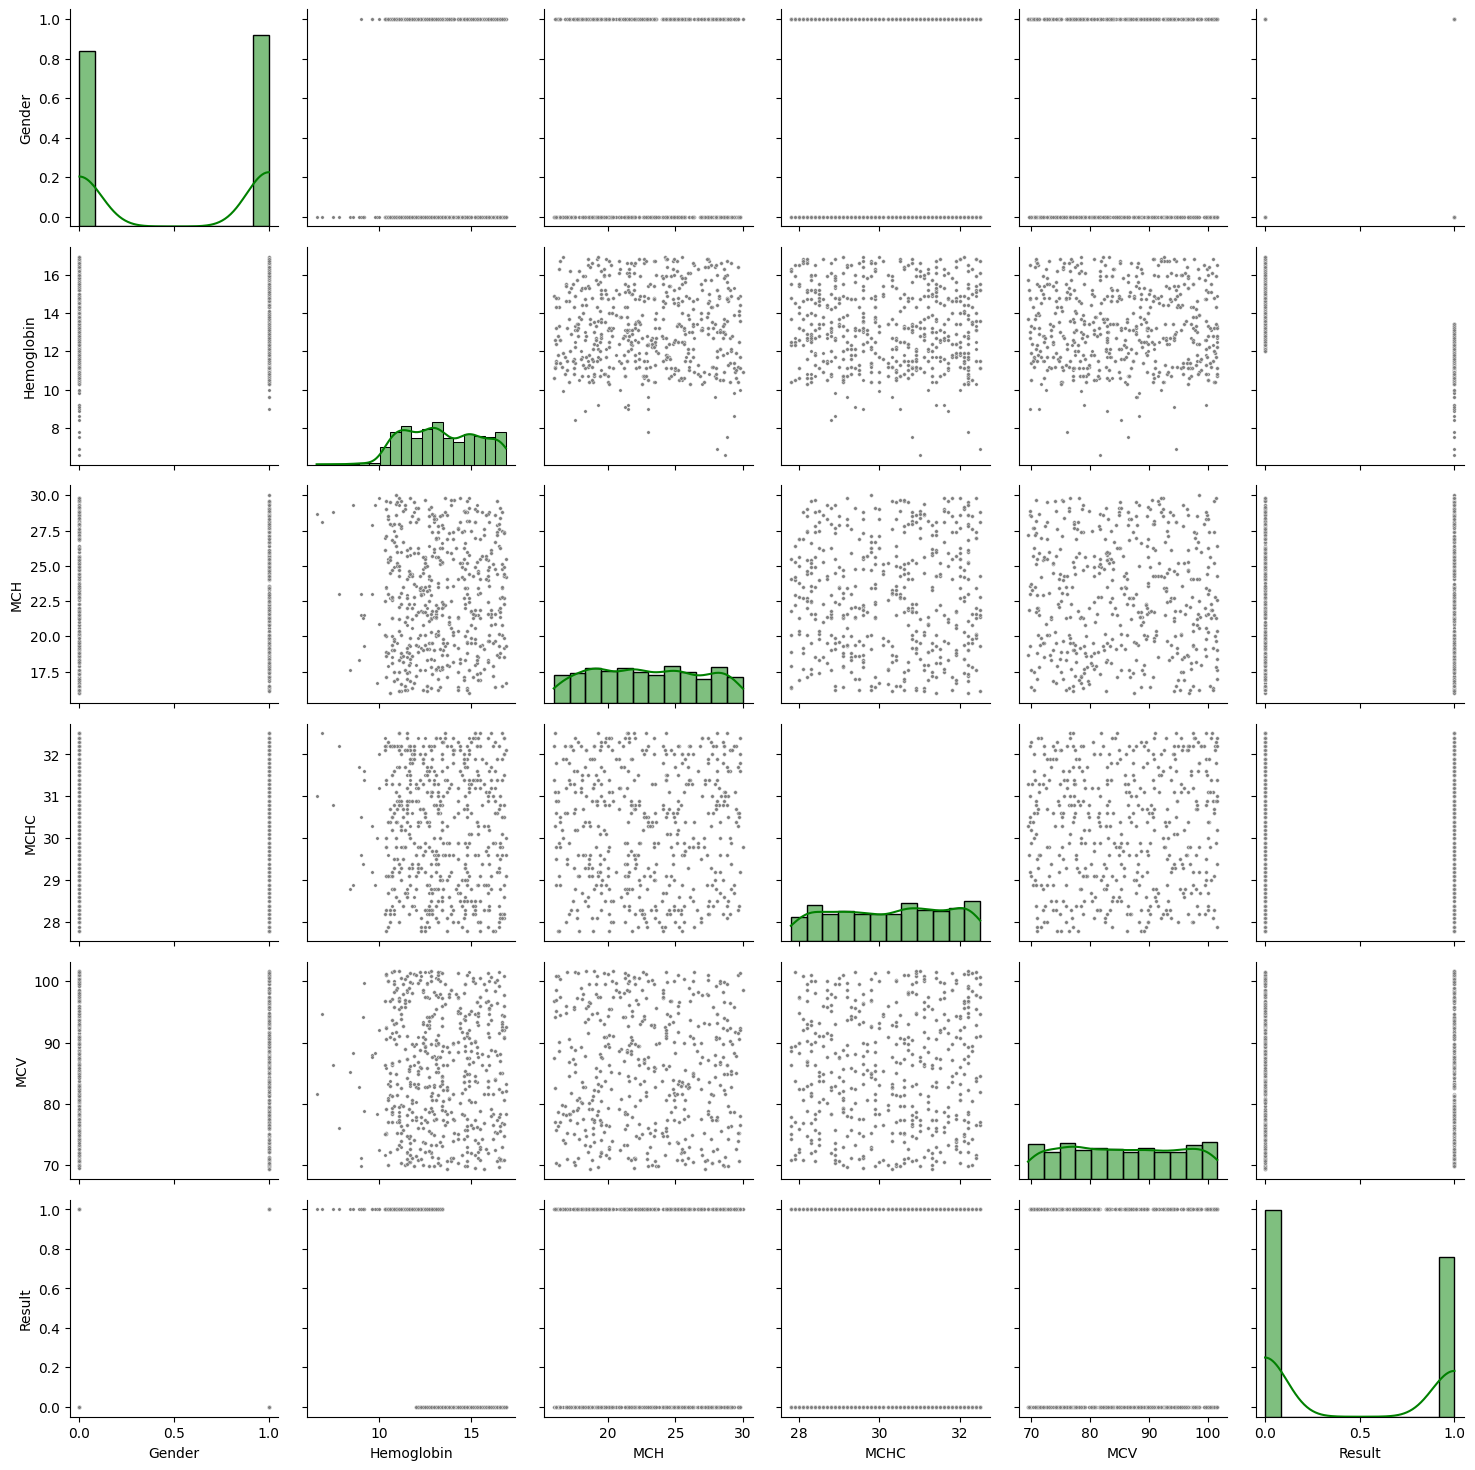

In [17]:
g = sns.PairGrid(dataset)
g.map_diag(sns.histplot, kde=True, color='Green')
g.map_offdiag(sns.scatterplot, color="gray", s=6);

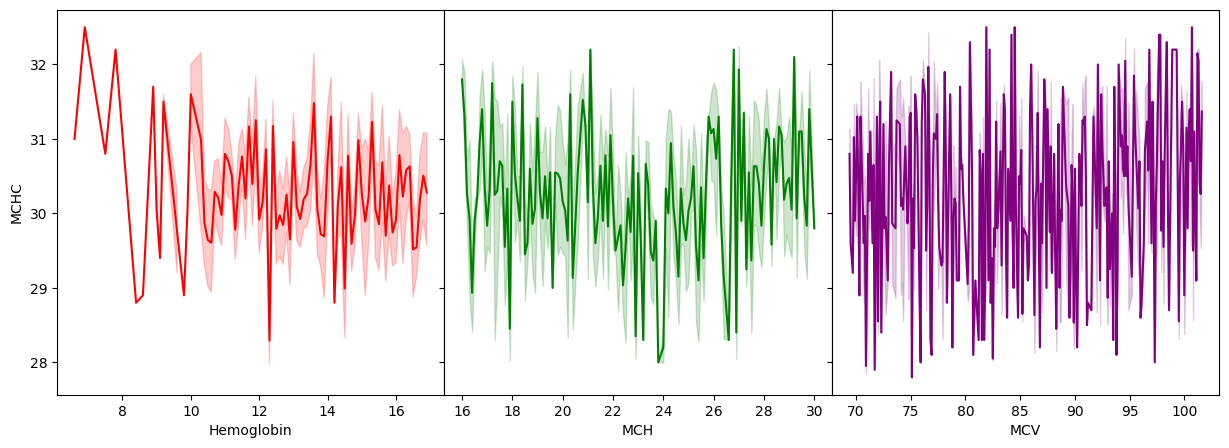

In [18]:
fig, ax = plt.subplots(ncols = 3, nrows=1, figsize=(15,5), sharex='col', sharey='row');
plt.subplots_adjust(wspace=0, hspace=0)

# Como as variáveis se relacionam com a Concentração de Hemoglobina
# Encontramos uma relação interessante entre Hemoglobina e o MCHC.
# Vamores baixos de Hb são seguidos de valores baixos de MCHC

sns.lineplot(ax=ax[0], data=dataset, x='Hemoglobin', y='MCHC', color='red');
sns.lineplot(ax=ax[1], data=dataset, x='MCH', y='MCHC', color='green');
sns.lineplot(ax=ax[2], data=dataset, x='MCV', y='MCHC', color='purple');

In [19]:
X = dataset.iloc[:, 1:5].values
X

array([[14.9, 22.7, 29.1, 83.7],
       [15.9, 25.4, 28.3, 72. ],
       [ 9. , 21.5, 29.6, 71.2],
       ...,
       [13.1, 17.7, 28.1, 80.7],
       [14.3, 16.2, 29.5, 95.2],
       [11.8, 21.2, 28.4, 98.1]])

In [22]:
y = dataset.iloc[:, 5].values
y

array([0, 0, 1, ..., 1, 0, 1])

In [23]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [25]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []
resultados_regressao = []

for i in range(30):
  # print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_train, y_train, cv = kfold)
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, X_train, y_train, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_train, y_train, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, X_train, y_train, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, X_train, y_train,cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_train, y_train, cv = kfold)
  resultados_rede_neural.append(scores.mean())

In [26]:
np.max(resultados_arvore),  np.max(resultados_random_forest), np.max(resultados_knn), np.max(resultados_logistica), np.max(resultados_svm), np.max(resultados_rede_neural)

(0.9771075919888215,
 0.9823785126533146,
 0.8662785281788542,
 0.8987734823785125,
 0.8951637944418568,
 0.8759354137556281)

In [43]:
from sklearn import tree

clf = DecisionTreeClassifier(max_depth=3, criterion="gini")
clf = clf.fit(X_train, y_train)

[Text(0.6, 0.875, 'x[0] <= 13.45\ngini = 0.494\nsamples = 1136\nvalue = [631, 505]\nclass = 0'),
 Text(0.4, 0.625, 'x[0] <= 11.95\ngini = 0.292\nsamples = 614\nvalue = [109, 505]\nclass = 1'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 321\nvalue = [0, 321]\nclass = 1'),
 Text(0.6, 0.375, 'x[3] <= 81.3\ngini = 0.467\nsamples = 293\nvalue = [109, 184]\nclass = 1'),
 Text(0.4, 0.125, 'gini = 0.334\nsamples = 104\nvalue = [22, 82]\nclass = 1'),
 Text(0.8, 0.125, 'gini = 0.497\nsamples = 189\nvalue = [87, 102]\nclass = 1'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 522\nvalue = [522, 0]\nclass = 0')]

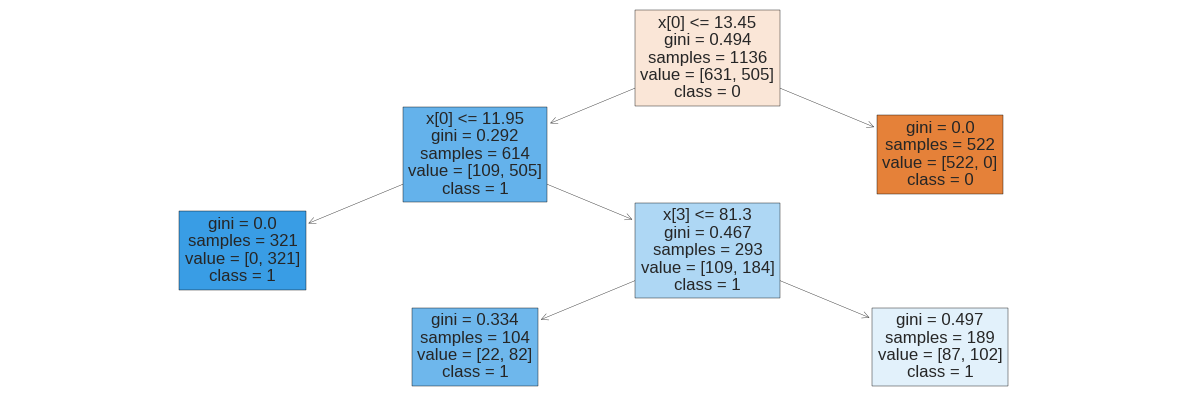

In [44]:
fig, axes = plt.subplots(figsize=(15,5), ncols=1, nrows=1)
tree.plot_tree(clf, class_names=['0', '1'], filled=True)

In [29]:
arvore = DecisionTreeClassifier(criterion='gini')
arvore.fit(X_train, y_train)

DecisionTreeClassifier()

#### MATRIZ DE CONFUSÃO ####
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       170
           1       0.98      0.99      0.99       115

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285



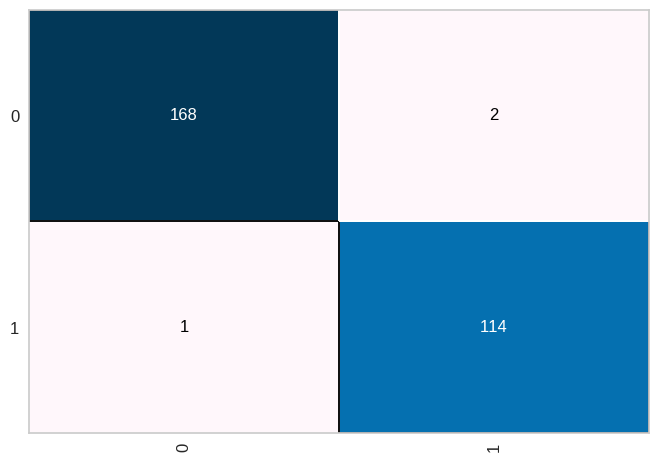

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix


print('#### MATRIZ DE CONFUSÃO ####')
cm = ConfusionMatrix(arvore,
                     cmap = 'PuBu')
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

previsoes = arvore.predict(X_test)
print(classification_report(y_test, previsoes))

In [31]:
arvore.feature_importances_

array([0.78764483, 0.05026844, 0.06300659, 0.09908014])

#### MATRIZ DE CONFUSÃO ####
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       170
           1       0.75      0.87      0.81       115

    accuracy                           0.83       285
   macro avg       0.83      0.84      0.83       285
weighted avg       0.84      0.83      0.83       285



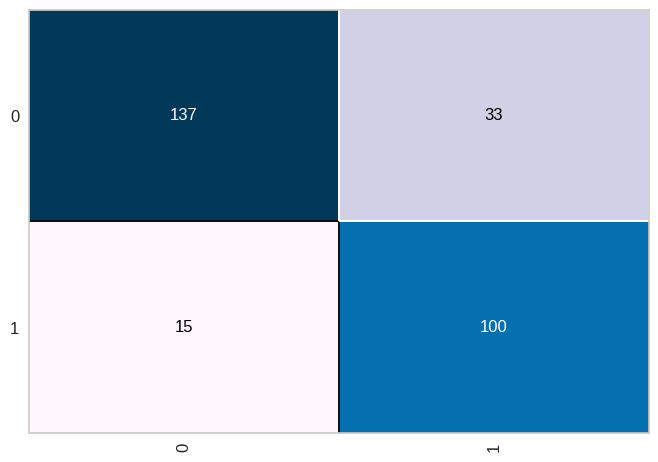

In [33]:
print('#### MATRIZ DE CONFUSÃO ####')
cm = ConfusionMatrix(knn,
                     cmap = 'PuBu')
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

previsoes = knn.predict(X_test)
print(classification_report(y_test, previsoes))

#### MATRIZ DE CONFUSÃO ####
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       170
           1       0.78      0.88      0.82       115

    accuracy                           0.85       285
   macro avg       0.84      0.85      0.85       285
weighted avg       0.86      0.85      0.85       285



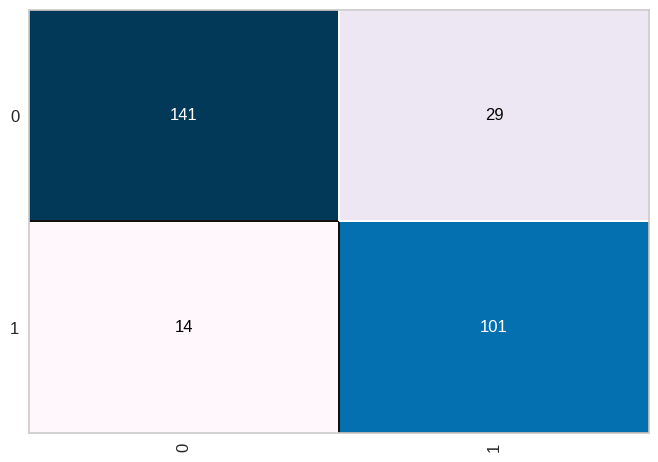

In [34]:
print('#### MATRIZ DE CONFUSÃO ####')
cm = ConfusionMatrix(rede_neural,
                     cmap = 'PuBu')
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

previsoes = rede_neural.predict(X_test)
print(classification_report(y_test, previsoes))

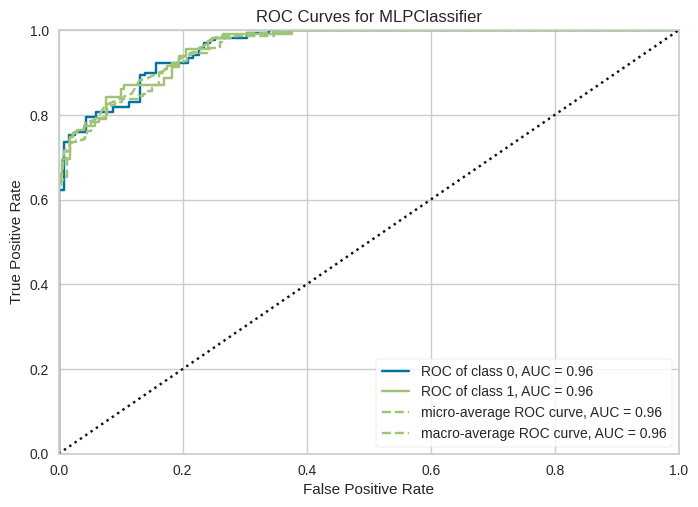

In [35]:
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
model = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   ;

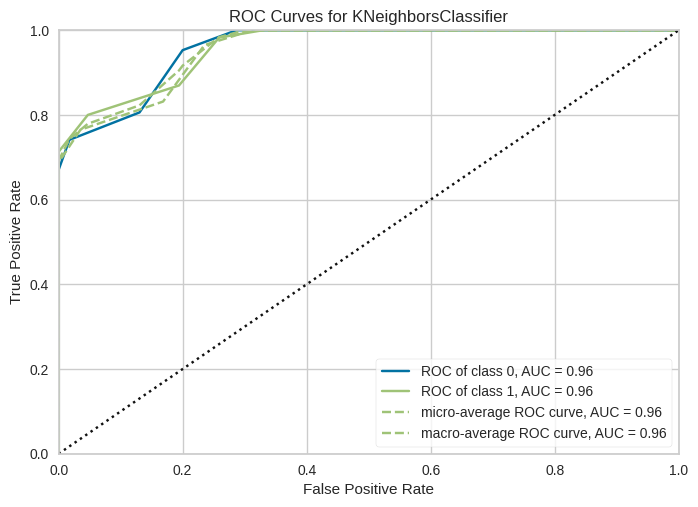

In [37]:
model = KNeighborsClassifier()
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   ;